In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00


### load library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_path = '/content/drive/MyDrive/STAT/AMZN_Clean.csv'
# Load the CSV file, parse dates, and remove timezone
df = pd.read_csv(df_path, parse_dates=['Date'])
df['Date'] = df['Date'].dt.tz_localize(None)  # Remove timezone info
df.set_index('Date', inplace=True)

df

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2019-01-02,0,76.956497,76.956497,77.667999,73.046501,73.260002,159662000
2019-01-03,1,75.014000,75.014000,76.900002,74.855499,76.000504,139512000
2019-01-04,2,78.769501,78.769501,79.699997,75.915497,76.500000,183652000
2019-01-07,3,81.475502,81.475502,81.727997,79.459503,80.115501,159864000
2019-01-08,4,82.829002,82.829002,83.830498,80.830498,83.234497,177628000
...,...,...,...,...,...,...,...
2023-12-22,1253,153.419998,153.419998,154.350006,152.710007,153.770004,29480100
2023-12-26,1254,153.410004,153.410004,153.979996,153.029999,153.559998,25067200
2023-12-27,1255,153.339996,153.339996,154.779999,153.119995,153.559998,31434700


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5007.113, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5008.844, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5008.858, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5005.116, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5008.830, Time=3.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 13.300 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1006
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2501.558
Date:                Mon, 18 Nov 2024   AIC                           5005.116
Time:                        14:55:18   BIC                           5010.029
Sample:                             0   HQIC                          5006.983
              

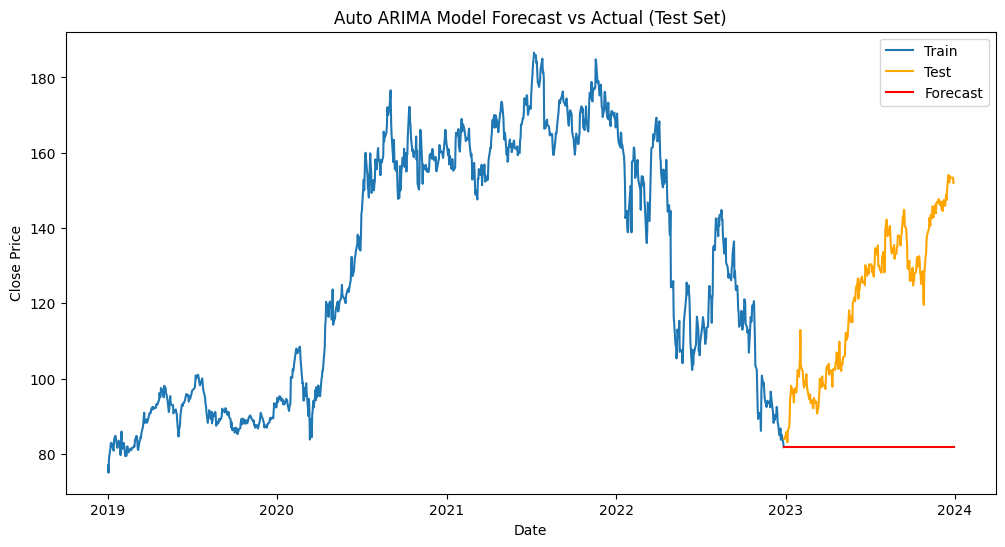

In [5]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Close' is the column with daily closing prices
# Train-test split
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train, test = df['Adj Close'][:train_size], df['Adj Close'][train_size:]

# Fit auto_arima model on the training data
model = auto_arima(train, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Summary of the model
print(model.summary())

# Forecast for the test period
forecast = model.predict(n_periods=len(test))
forecast_index = test.index

mae = mean_absolute_error(test, forecast)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast))

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Directional Accuracy (DA)
direction_true = np.sign(np.diff(test.values))  # True price direction
direction_pred = np.sign(np.diff(forecast))    # Predicted price direction
directional_accuracy = np.mean(direction_true == direction_pred) * 100

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Directional Accuracy (DA): {directional_accuracy:.2f}%")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Auto ARIMA Model Forecast vs Actual (Test Set)')
plt.legend()
plt.show()


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0719 - val_loss: 0.0023
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0089 - val_loss: 0.0017
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0066 - val_loss: 0.0028
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0069 - val_loss: 0.0020
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0063 - val_loss: 0.0035
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


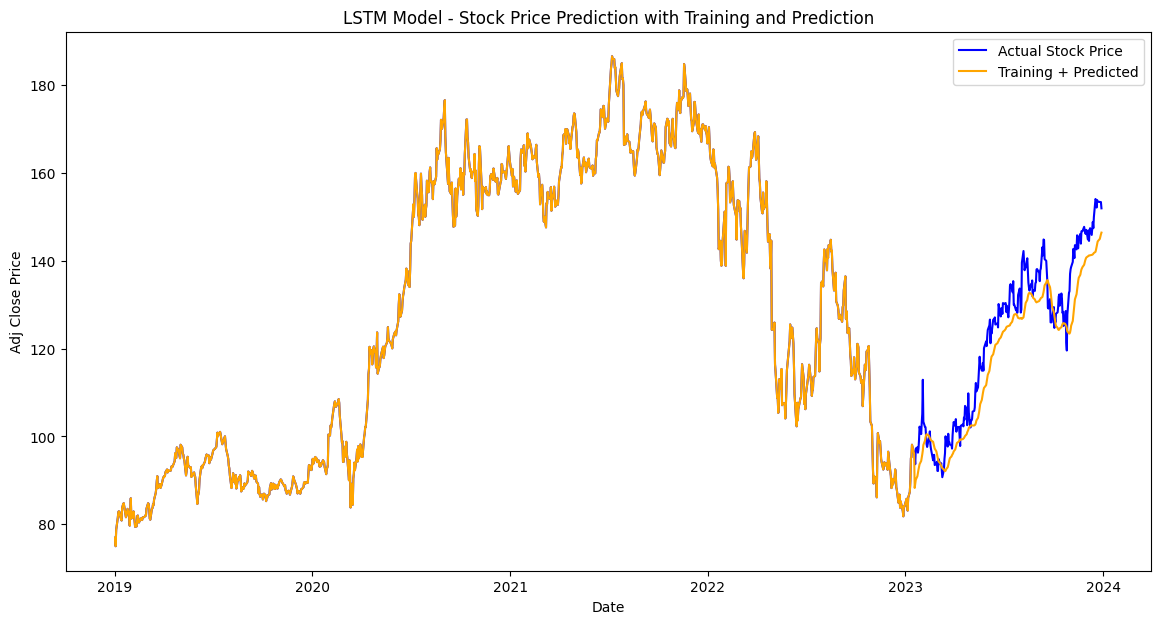

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming 'df' is your DataFrame and 'Close' is the column with daily closing prices
# Convert to numpy array for scaling and reshape
data = df[['Adj Close']].values

# Scale the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Define sequence length and prepare the dataset
sequence_length = 60  # This means each input sequence will be 60 days of past data
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data to fit LSTM model (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))


# Make predictions on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Undo scaling

# Inverse transform the actual test values as well
y_test_scaled = scaler.inverse_transform([y_test])
y_test_scaled = y_test_scaled[0]

# Create a DataFrame to hold both training data and predictions
train_data = df['Adj Close'][:train_size + sequence_length]  # Adding sequence_length to align with X_train
predicted_data = pd.DataFrame(predictions, index=df['Adj Close'].index[train_size + sequence_length:], columns=['Predicted'])

# Concatenate training data and predictions
combined_data = pd.concat([train_data, predicted_data['Predicted']], axis=0)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['Adj Close'], label='Actual Stock Price', color='blue')
plt.plot(combined_data, label='Training + Predicted', color='orange')
plt.title('LSTM Model - Stock Price Prediction with Training and Prediction')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_scaled, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_scaled, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_scaled - predictions.flatten()) / y_test_scaled)) * 100

# Calculate Directional Accuracy (DA)
direction_true = np.sign(np.diff(y_test_scaled))
direction_pred = np.sign(np.diff(predictions.flatten()))
directional_accuracy = np.mean(direction_true == direction_pred) * 100

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Directional Accuracy (DA): {directional_accuracy:.2f}%")


Mean Squared Error (MSE): 42.9456
Root Mean Squared Error (RMSE): 6.5533
Mean Absolute Error (MAE): 5.5821
Mean Absolute Percentage Error (MAPE): 4.45%
Directional Accuracy (DA): 46.03%
